In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

In [61]:
proyectos = read_csv("data/mapeo_proyectos.csv")

In [62]:
mini = proyectos[["ID proyecto","Fuente de información"]] 
mini = mini.groupby('ID proyecto')["Fuente de información"].apply(list).reset_index(name='Fuente de información')
mini = mini["Fuente de información"]
mini

0      [Fuente propia, Fuente propia, Fuente propia, ...
1      [Congresos Humanidades Digitales Hispánicas, C...
2                                              [GrinUGR]
3      [Congresos Humanidades Digitales Hispánicas, C...
4      [Congresos Humanidades Digitales Hispánicas, C...
                             ...                        
363                   [Agencia Estatal de Investigación]
364                   [Agencia Estatal de Investigación]
365                   [Agencia Estatal de Investigación]
366                   [Agencia Estatal de Investigación]
367                   [Agencia Estatal de Investigación]
Name: Fuente de información, Length: 368, dtype: object

In [63]:
sources_list = mini.tolist()
def_list = []
for sources in sources_list:
    item = sources[0]
    if "," in item:
        comas = item.split(", ")
        for element in comas:
            def_list.append(element.strip())
    else: 
        def_list.append(item.strip())

In [45]:
counter = Counter(def_list).most_common()

In [46]:
sources_dict = dict(counter)

In [47]:
acronimos = read_csv("data/Fuentes-Table 1.csv")
acronimos = acronimos.set_index('Fuente propia')

In [48]:
acronimos_dict = acronimos.T.to_dict('records')

In [49]:
acronimos_dict = acronimos_dict[0]

In [64]:
# new dict with acronims
corrected_dict = {}
for key, value in sources_dict.items():
    corrected_dict.update({ acronimos_dict.get(key, "Vacío"): value }) 

# Print treemap

In [65]:
import squarify

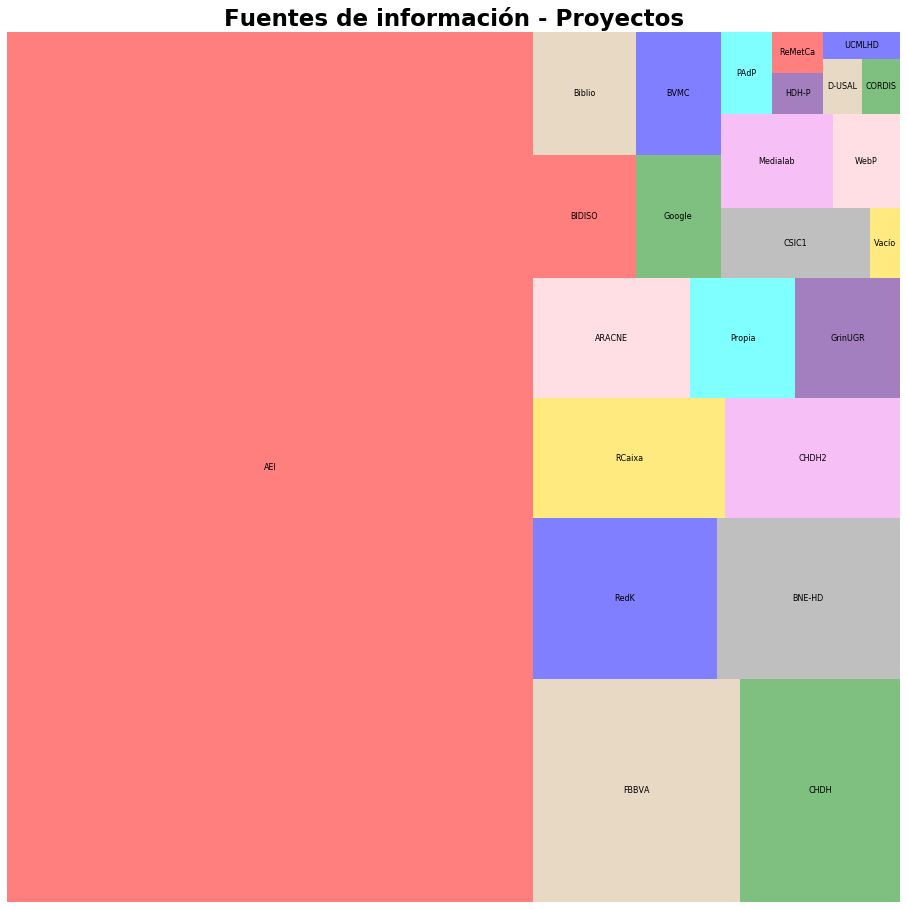

In [66]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
colors = ["red", "tan", "green", "blue", "grey", "gold", "violet", "pink", "cyan", "indigo"]
squarify.plot(sizes=corrected_dict.values(), label=corrected_dict.keys(), color=colors, alpha=.5, text_kwargs={'fontsize':8})
plt.title("Fuentes de información - Proyectos",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show() 

# Print table

In [67]:
sources_table = pd.DataFrame.from_dict(sources_dict, orient='index')
sources_table

,0
Agencia Estatal de Investigación,218
Fundación BBVA,22
Congresos Humanidades Digitales Hispánicas,17
Red Knowmetrics,14
Jornada: Proyectos de humanidades digitales en la BNE,14
Proyectos subvencionados RecerCaixa,11
CONGRESO INTERNACIONAL HUMANIDADES DIGITALES: VISIBILIDAD Y DIFUSIÓN DE LA INVESTIGACIÓN,10
ARACNE,9
Fuente propia,6
GrinUGR,6
